In [20]:
import sys, os, re
sys.path.insert(0, "../../../iso-reconstruct-benchmark2/Isosceles_bmarking_routines")


In [21]:
import pylib.BenchmarkingRoutines
from importlib import reload
reload(pylib.BenchmarkingRoutines)
from pylib.BenchmarkingRoutines import *

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
ref_gtf_file = "../reference_data/gencode.vM32.annotation.gtf"
ref_quant_file = "../reference_data/Mouse_isoseqsim_ground_truth_transcript_id_count.tsv"

i_ref_df = indexDfByIntronId(parseGTFtoIntronIDsandQuants(ref_gtf_file, ref_quant_file))
i_ref_df

-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


,transcript_ids,gene_ids,tpm
intronId,,,
"chr10:100283605-100284685:-,chr10:100284912-100286100:-,chr10:100286270-100287243:-,chr10:100287347-100292909:-,chr10:100293021-100294776:-,chr10:100294897-100296821:-,chr10:100296970-100301882:-,chr10:100302135-100307190:-,chr10:100307363-100307776:-,chr10:100307892-100310236:-,chr10:100310336-100312418:-,chr10:100312637-100313666:-,chr10:100313884-100323023:-",ENSMUST00000058154.15,ENSMUSG00000036676.15,72
"chr10:100284912-100286100:-,chr10:100286270-100287243:-,chr10:100287347-100292909:-,chr10:100293021-100294776:-,chr10:100294897-100296821:-,chr10:100296970-100301882:-,chr10:100302135-100307190:-,chr10:100307363-100307776:-,chr10:100307892-100310236:-,chr10:100310336-100312418:-,chr10:100312637-100313666:-,chr10:100313884-100323023:-",ENSMUST00000099318.10,ENSMUSG00000036676.15,1
"chr10:100313884-100320912:-,chr10:100321047-100323023:-",ENSMUST00000134477.2,ENSMUSG00000036676.15,27
"chr10:100323614-100324140:+,chr10:100324270-100324423:+,chr10:100324501-100325181:+,chr10:100325251-100326008:+,chr10:100326055-100328509:+,chr10:100328653-100330762:+,chr10:100330816-100331502:+,chr10:100331523-100331684:+,chr10:100331837-100332550:+,chr10:100332733-100333801:+,chr10:100333891-100334923:+,chr10:100335046-100336008:+,chr10:100336132-100336964:+,chr10:100337137-100344525:+,chr10:100344688-100346348:+,chr10:100346449-100346523:+,chr10:100346611-100348148:+,chr10:100348261-100349781:+,chr10:100349866-100350319:+,chr10:100350462-100350995:+,chr10:100351160-100352015:+,chr10:100352165-100353638:+,chr10:100353754-100354315:+,chr10:100354418-100354506:+,chr10:100354737-100359091:+,chr10:100359265-100364410:+,chr10:100364522-100365879:+,chr10:100366085-100366962:+,chr10:100367114-100372667:+,chr10:100372779-100373297:+,chr10:100373753-100374787:+,chr10:100374952-100375845:+,chr10:100375953-100376197:+,chr10:100376332-100377411:+,chr10:100377678-100378278:+,chr10:100378386-100379103:+,chr10:100379303-100380778:+,chr10:100380992-100382236:+,chr10:100382374-100384589:+,chr10:100384811-100385114:+,chr10:100385237-100387225:+,chr10:100387371-100387678:+,chr10:100387834-100390272:+,chr10:100390396-100393932:+,chr10:100394067-100395466:+,chr10:100395553-100397101:+,chr10:100397266-100397970:+,chr10:100398093-100399127:+,chr10:100399300-100402872:+,chr10:100403014-100403942:+,chr10:100404016-100404676:+,chr10:100404771-100407924:+,chr10:100408004-100408741:+",ENSMUST00000220346.2,ENSMUSG00000019971.11,7
"chr10:100324270-100324423:+,chr10:100324501-100325181:+,chr10:100325251-100326008:+,chr10:100326055-100328509:+,chr10:100328653-100330762:+,chr10:100330816-100331684:+,chr10:100331837-100332550:+,chr10:100332733-100333801:+,chr10:100333891-100334923:+,chr10:100335046-100336008:+,chr10:100336132-100336964:+,chr10:100337137-100344525:+,chr10:100344688-100346348:+,chr10:100346449-100346523:+,chr10:100346611-100348148:+,chr10:100348261-100349781:+,chr10:100349866-100350319:+,chr10:100350462-100350995:+,chr10:100351160-100352015:+,chr10:100352165-100353638:+,chr10:100353754-100354315:+,chr10:100354418-100354506:+,chr10:100354737-100359091:+,chr10:100359265-100364410:+,chr10:100364522-100365879:+,chr10:100366085-100366962:+,chr10:100367114-100372667:+,chr10:100372779-100373297:+,chr10:100373753-100374787:+,chr10:100374952-100375845:+,chr10:100375953-100376197:+,chr10:100376332-100377411:+,chr10:100377678-100378278:+,chr10:100378386-100379103:+,chr10:100379303-100380778:+,chr10:100380992-100382236:+,chr10:100382374-100384589:+,chr10:100384811-100385114:+,chr10:100385237-100387225:+,chr10:100387371-100387678:+,chr10:100387834-100390272:+,chr10:100390396-100393932:+,chr10:100394067-100395466:+,chr10:100395553-100397101:+,chr10:100397266-100397970:+,chr10:100398093-100399127:+,chr10:100399300-100402872:+,chr10:100403014-100403942:+,chr10:100404016-100404676:+,chr10:100404771-100407924:+,chr10:100408004-100408741:+",ENSMUST00000219765.2,ENSMUSG00000019971.11,5
...,...,...,...
"chrY:90797248-90804564:+,chrY:90804

In [24]:
 i_ref_df["tpm"] = i_ref_df["tpm"] / i_ref_df["tpm"].sum() * 1e6

In [25]:
i_ref_df.copy().reset_index().to_csv("refDf.intron_ids_and_expression.tsv", sep="\t", index=False)

In [36]:
set_color_palette("FLAMES", "gainsboro", "solid")
set_color_palette("IsoQuant", "blue", "solid")
set_color_palette("IsoSeq", "orchid", "solid")
set_color_palette("LRAA", "teal", "solid")
set_color_palette("Mandalorion", "lightblue", "solid")
set_color_palette("Oarfish_align", "khaki", "solid")
set_color_palette("Oarfish_reads", "peachpuff", "solid")
set_color_palette("bambu", "forestgreen", "solid")
set_color_palette("espresso", "brown", "solid")
set_color_palette("flair", "pink", "solid")
set_color_palette("isosceles", "red", "solid")
set_color_palette("stringtie", "aquamarine", "solid")
set_color_palette("talon", "orange", "solid")


In [28]:
quant_only_dir = "processed_prog_results"

prog_quant_files = {  
    "FLAMES" : ["FLAMES.tsv", "processed_prog_results/mouse_isoseqsim_e000.FLAMES.gtf"],
    "IsoQuant" : ["IsoQuant.tsv", ref_gtf_file ],
    "IsoSeq" : ["IsoSeq.tsv", "raw_prog_results/mouse_isoseqsim_e000.IsoSeq.ref-filtered.ID.gff"],
    "LRAA" : ["LRAA.tsv", ref_gtf_file ],
    "Mandalorion" : ["Mandalorion.tsv", "raw_prog_results/mouse_isoseqsim_e000.Mandalorian.Isoforms.filtered.clean.gtf"],
    "Oarfish_align" : ["Oarfish_align.tsv", ref_gtf_file],
    "Oarfish_reads" : ["Oarfish_reads.tsv", ref_gtf_file],
    "espresso" : ["espresso.tsv", ref_gtf_file ],
    "flair" : ["flair.tsv", ref_gtf_file ],
    "isosceles" : ["isosceles.tsv", "raw_prog_results/mouse_isoseqsim_e000.isosceles.gtf"],
    "bambu" : ["bambu.tsv", ref_gtf_file],
    "stringtie" : ["stringtie.tsv", ref_gtf_file],
    "talon" : ["talon.tsv", "raw_prog_results/mouse_isoseqsim_e000_talon.gtf"]
}


fullQuantsDf_dict = {}
for progname, (tsv_fname, gtf_fname) in prog_quant_files.items():
    tsv_fname = os.path.join(quant_only_dir, tsv_fname)
    print(progname, tsv_fname, gtf_fname)
    fullQuantsDf_dict[progname] = indexDfByIntronId(parseGTFtoIntronIDsandQuants(gtf_fname, tsv_fname))
    

FLAMES processed_prog_results/FLAMES.tsv processed_prog_results/mouse_isoseqsim_e000.FLAMES.gtf
-processGtf( processed_prog_results/mouse_isoseqsim_e000.FLAMES.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id']


IsoQuant processed_prog_results/IsoQuant.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


IsoSeq processed_prog_results/IsoSeq.tsv raw_prog_results/mouse_isoseqsim_e000.IsoSeq.ref-filtered.ID.gff
-processGtf( raw_prog_results/mouse_isoseqsim_e000.IsoSeq.ref-filtered.ID.gff )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id']


LRAA processed_prog_results/LRAA.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


Mandalorion processed_prog_results/Mandalorion.tsv raw_prog_results/mouse_isoseqsim_e000.Mandalorian.Isoforms.filtered.clean.gtf
-processGtf( raw_prog_results/mouse_isoseqsim_e000.Mandalorian.Isoforms.filtered.clean.gtf )



INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id', 'gene_name']


Oarfish_align processed_prog_results/Oarfish_align.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


Oarfish_reads processed_prog_results/Oarfish_reads.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


espresso processed_prog_results/espresso.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


flair processed_prog_results/flair.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


isosceles processed_prog_results/isosceles.tsv raw_prog_results/mouse_isoseqsim_e000.isosceles.gtf
-processGtf( raw_prog_results/mouse_isoseqsim_e000.isosceles.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'compatible_gene_ids', 'compatible_gene_names', 'compatible_tx', 'splicing_support_level', 'fivethree_support_level']


bambu processed_prog_results/bambu.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


stringtie processed_prog_results/stringtie.tsv ../reference_data/gencode.vM32.annotation.gtf
-processGtf( ../reference_data/gencode.vM32.annotation.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


talon processed_prog_results/talon.tsv raw_prog_results/mouse_isoseqsim_e000_talon.gtf
-processGtf( raw_prog_results/mouse_isoseqsim_e000_talon.gtf )



INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_status', 'gene_type', 'talon_gene', 'havana_gene', 'level', 'mgi_id', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'talon_transcript', 'havana_transcript', 'source', 'tag', 'transcript_support_level', 'exon_number', 'exon_id', 'talon_exon', 'exon_status', 'ont', 'ccdsid', 'protein_id', 'ISM-prefix_to_IDs', 'ISM-prefix_transcript', 'ISM_to_IDs', 'ISM_transcript', 'ISM-suffix_to_IDs', 'ISM-suffix_transcript', 'NIC_transcript', 'NNC_transcript', 'intergenic_novel', 'intergenic_transcript', 'antisense_gene', 'gene_antisense_to_IDs', 'antisense_transcript']


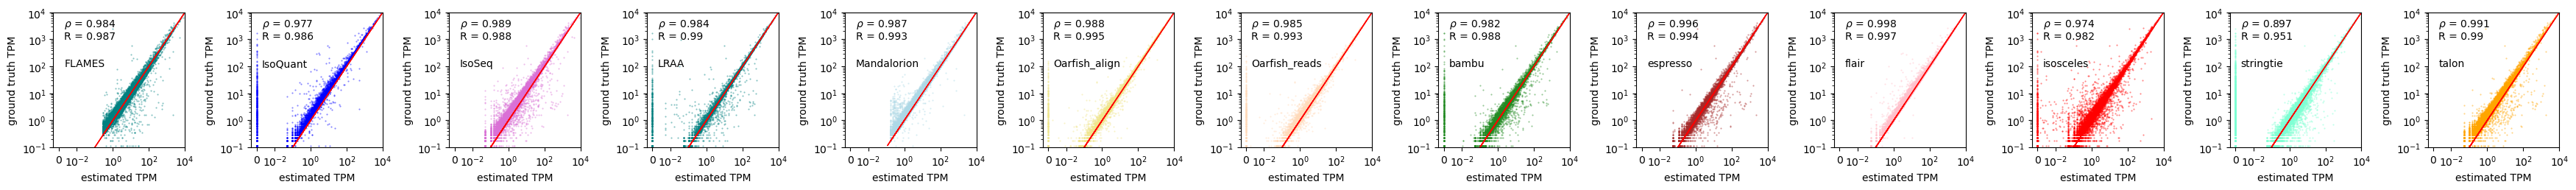

In [29]:
scatterplot_adj(i_ref_df, fullQuantsDf_dict)

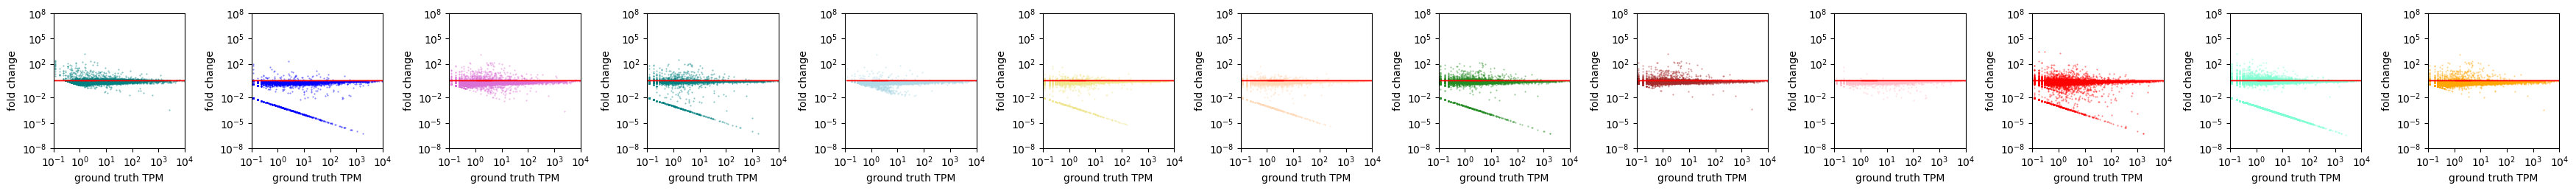

In [30]:
ma_plot_adj(i_ref_df, fullQuantsDf_dict)

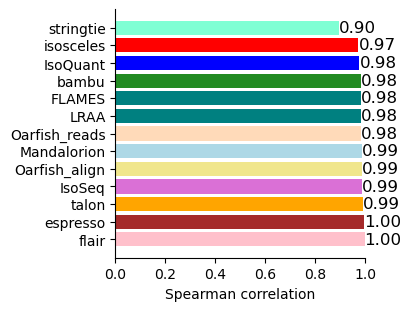

In [31]:
cor_spearman_barplot(i_ref_df, fullQuantsDf_dict)

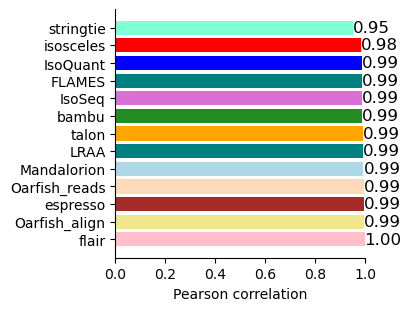

In [32]:
cor_pearson_barplot(i_ref_df, fullQuantsDf_dict)

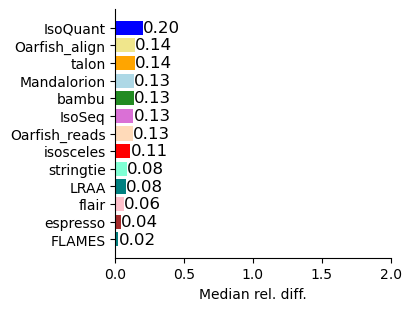

In [33]:
rel_diff_barplot(i_ref_df, fullQuantsDf_dict, 'median')

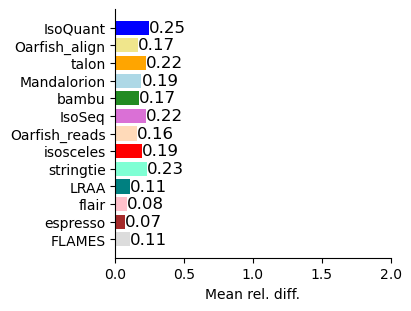

In [38]:
rel_diff_barplot(i_ref_df, fullQuantsDf_dict, 'mean')

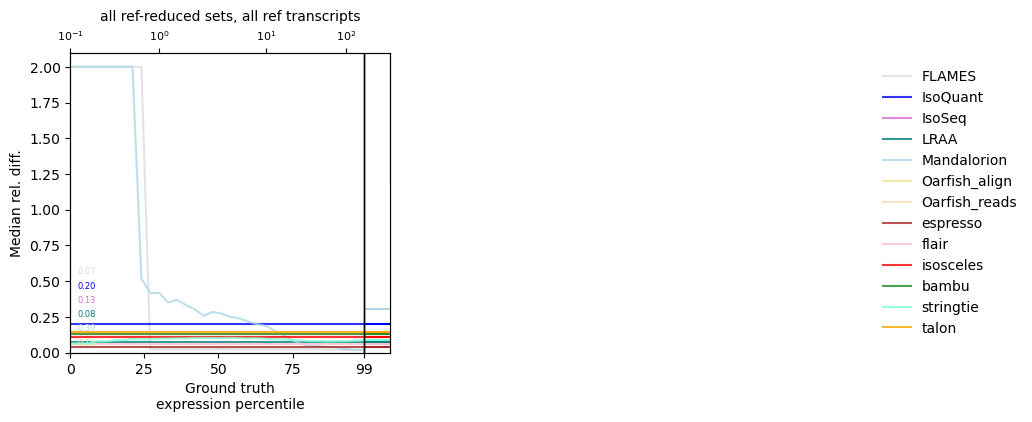

In [37]:
rel_diff_vs_expr_percentile_plot(i_ref_df, fullQuantsDf_dict, 33, 'median',
                                 'all ref-reduced sets, all ref transcripts')